# Escola de Dados - Python para inovação cívica

## Módulo 2: Análise exporatória de dados do Legislativo

## CEAP

### Aula 02: Acessando os dados da CEAP via API

**Para** baixar os arquivos das despesas pela Cota para Exercício da Atividade Parlamentar, podemos utilizar a API da câmara legislativa. Para acessar o arquivo de cada ano, podemos usar a URL no formato `http://www.camara.leg.br/cotas/Ano-{ano}.{formato}[.zip]`.

Você pode encontrar mais detalhes nesse [link](https://dadosabertos.camara.leg.br/swagger/api.html#staticfile).

Para fazer o download dos arquivos usando Python podemos usar diversas formas. Para esse tutorial, vamos usar o pacote `requests`.

In [3]:
url = f"http://www.camara.leg.br/cotas/Ano-2020.csv.zip"

In [4]:
import requests

# fazendo o download do conteúdo do arquivo
r = requests.get(url)

In [5]:
# abrindo um arquivo no seu computador
file = open(f"Ano-2020.csv.zip", "wb")

# escrever o conteúdo
file.write(r.content)
file.close()

In [6]:
# outra forma de criar arquivos, e escrever conteúdo

# with open(f"Ano-{year}.csv.zip", "wb") as code:
#    code.write(r.content)

Como o arquivo baixado pela API é um arquivo zip, vamos precisar descompatar. Vamos usar o `zipfile`, um módulo que nos dá ferramentas para diversas manipulações de arquivos zipados.

In [7]:
from zipfile import ZipFile

In [8]:
zip_file = ZipFile(f"Ano-2020.csv.zip", 'r')

In [9]:
zip_file.namelist()

['Ano-2020.csv']

In [12]:
zip_file.extract(member=f"Ano-2020.csv", path=f"reembolso-2020")

'reembolso-2020/Ano-2020.csv'

In [ ]:
# caso a gente queira extrair todo o conteúdo do arquivo zip

# zip_file.extractall(path=f"reimbursements-{year}")

In [13]:
zip_file.close()

### Aula 03: Lendo os dados com Pandas

In [14]:
import pandas as pd

/Users/gabriela/Development/Contrib/okb/python-inovacao-civica/notebooks/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
pd.read_csv("reembolso-2020/Ano-2020.csv")

Opa! Erro na leitura do nosso arquivo. Quando encontramos esse erro na leitura de um arquivo, existe algumas possibilidades mais comuns, uma delas é que o caracter que separa as colunas pode não ser o que o `read_csv` espera. 

Confira da doc qual o separador considerado padrão, e depois confira no arquivo qual o separador que é utilizado.

In [30]:
df_reimbursements_2020 = pd.read_csv("reimbursements-2020/Ano-2020.csv", sep="???") 
# sep == delimiter

Vamos visualizar as 5 primeiras linhas do nosso Dataframe.

In [ ]:
df_reimbursements_2020.head()

Como podemos fazer para visualizar as 10 primeiras linhas?

Podemos também recuperar uma amosta aleatória do nosso Dataframe. Para isso, usamos o [`sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [ ]:
df_reimbursements_2020.sample()

Como podemos fazer para visualizar 5 amostras aleatórias?

#### Dicionário de Dados

Um passo importante para dar antes de começar a análisar é entender os dados que estamos manipulando. 

*Sempre procure o significado dos campos, procure entender quais os tipos de dados preenchem aquele campo. São dados numéricos? São caracteres? Não palavras usadas para categorizar/classificar os dados?*

| Elemento de Dado          | Nome do Dado                           | Definição do Dado                                                                                                                                                                                                                                                                                                                                                                                                                   |   |   |
|---------------------------|----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|
| txNomeParlamentar         | Nome Parlamentar                       | Nome adotado pelo Parlamentar ao tomar posse do seu mandato. Compõe-se de dois elementos: um prenome e o nome; dois nomes; ou dois prenomes, salvo, a juízo do Presidente da Casa legislativa, que poderá alterar essa regra para que não ocorram confusões.                                                                                                                                                                        |   |   |
| ideCadastro               | Identificador Único do Parlamentar     | Número que identifica unicamente um deputado federal na CD.                                                                                                                                                                                                                                                                                                                                                                         |   |   |
| nuCarteiraParlamentar     | Número da  Carteira Parlamentar        | Documento usado para identificar um deputado federal na CD. Pode alterar a cada Legislatura nova.                                                                                                                                                                                                                                                                                                                                   |   |   |
| nuLegislatura             | Número da  Legislatura                 | No contexto da cota CEAP, representa o ano base de início da legislatura e é utilizado para compor a Carteira Parlamentar, pois esta poderá ser alterada à medida que se muda de Legislatura.                                                                                                                                     |   |   |
| sgUF                      | Sigla da UF                            | No contexto da cota CEAP, representa a unidade da federação pela qual o deputado foi eleito e é utilizada para definir o valor da cota a que o deputado tem.                                                                                                                                                                                                                                                                        |   |   |
| sgPartido                 | Sigla do Partido                       | O seu conteúdo representa a sigla de um partido. Tem personalidade jurídica de direito privado e goza de autonomia e liberdade no que diz respeito à criação, organização e funcionamento, observados os princípios e preceitos constitucionais. |   |   |
| codLegislatura            | Código da Legislatura                  | No contexto da cota CEAP, o seu conteúdo representa o código identificador da Legislatura, que um número ordinal sequencial, alterado de um em um, a cada início de uma nova Legislatura (por exemplo, a Legislatura que iniciou em 2011 é a 54ª Legislatura).                                                                    |   |   |
| numSubCota                | Número da Subcota                      | No contexto da Cota CEAP, o conteúdo deste dado representa o código do Tipo de Despesa referente à despesa realizada pelo deputado e comprovada por meio da emissão de um documento fiscal, a qual é debitada na cota do deputado.                                                                                                                                                                                                  |   |   |
| txtDescricao              | Descrição da Subcota                   | O seu conteúdo é a descrição do Tipo de Despesa relativo à despesa em questão.                                                                                                                                                                                                                                                                                                                                                      |   |   |
| numEspecificacaoSubCota   | Número da Especificação da Subcota     | No contexto da Cota CEAP, há despesas cujo Tipo de Despesa necessita ter uma especificação mais detalhada (por exemplo, “Combustível”). O conteúdo deste dado representa o código desta especificação mais detalhada.                                                                                                                                                                                                               |   |   |
| txtDescricaoEspecificacao | Descrição da Especificação da Subcota  | Representa a descrição  especificação mais detalhada de um referido Tipo de Despesa.                                                                                                                                                                                                                                                                                                                                                |   |   |
| txtFornecedor             | Fornecedor                             | O conteúdo deste dado representa o nome do fornecedor do produto ou serviço presente no documento fiscal                                                                                                                                                                                                                                                                                                                            |   |   |
| txtCNPJCPF                | CNPJ/CPF                               | O conteúdo deste dado representa o CNPJ ou o CPF do emitente do documento fiscal, quando se tratar do uso da cota em razão do reembolso despesas comprovadas pela emissão de documentos fiscais.                                                                                                                                                                                                                                    |   |   |
| txtNumero                 | Número do Documento                    | O conteúdo deste dado representa o número de face do documento fiscal emitido ou o número do documento que deu causa à despesa debitada na cota do deputado.                                                                                                                                                                                                                                                                        |   |   |
| indTipoDocumento          | Indicativo de Tipo de Documento Fiscal | Este dado representa o tipo de documento do fiscal – 0 (Zero), para Nota Fiscal; 1 (um), para Recibo; e 2, para Despesa no Exterior.                                                                                                                                                                                                                                                                                                |   |   |
| datEmissao                | Data de Emissão                        | O conteúdo deste dado é a data de emissão do documento fiscal ou a data do documento que tenha dado causa à despesa.                                                                                                                                                                                                                                                                                                                |   |   |
| vlrDocumento              | Valor do Documento                     | O seu conteúdo é o valor de face do documento fiscal ou o valor do documento que deu causa à despesa. Quando se tratar de bilhete aéreo, esse valor poderá ser negativo, significando que o referido bilhete é um bilhete de compensação, pois compensa um outro bilhete emitido e não utilizado pelo deputado (idem para o dado vlrLiquido abaixo).                                                                                |   |   |
| vlrGlosa                  | Valor da Glosa                         | O seu conteúdo representa o valor da glosa do documento fiscal que incidirá sobre o Valor do Documento, ou o valor da glosa do documento que deu causa à despesa.                                                                                                                                                                                                                                                                   |   |   |
| vlrLiquido                | Valor Líquido                          | O seu conteúdo representa o valor líquido do documento fiscal ou do documento que deu causa à despesa e será calculado pela diferença entre o Valor do Documento e o Valor da Glosa. É este valor que será debitado da cota do deputado. Caso o débito seja do Tipo Telefonia e o valor seja igual a zero, significa que a despesa foi franqueada.                                                                                  |   |   |
| numMes                    | Mês                                    | O seu conteúdo representa o Mês da competência financeira do documento fiscal ou do documento que deu causa à despesa. É utilizado, junto com o ano, para determinar em que período o débito gerará efeito financeiro sobre a cota.                                                                                                                                                                                                 |   |   |
| numAno                    | Ano                                    | O seu conteúdo representa o Ano da competência financeira do documento fiscal ou do documento que deu causa à despesa. É utilizado, junto com o mês, para determinar em que período o débito gerará efeito financeiro sobre a cota.                                                                                                                                                                                                 |   |   |
| numParcela                | Número da Parcela                      | O seu conteúdo representa o número da parcela do documento fiscal. Ocorre quando o documento tem de ser reembolsado de forma parcelada.                                                                                                                                                                                                                                                                                             |   |   |
| txtPassageiro             | Passageiro                             | O conteúdo deste dado representa o nome do passageiro, quando o documento que deu causa à despesa se tratar de emissão de bilhete aéreo.                                                                                                                                                                                                                                                                                            |   |   |
| txtTrecho                 | Trecho                                 | O conteúdo deste dado representa o trecho da viagem, quando o documento que deu causa à despesa se tratar de emissão de bilhete aéreo.                                                                                                                                                                                                                                                                                              |   |   |
| numLote                   | Número do Lote                         | No contexto da Cota CEAP, o Número do Lote representa uma capa de lote que agrupa os documentos que serão entregues à Câmara para serem ressarcidos. Este dado, juntamente com o Número do Ressarcimento, auxilia a localização do documento no Arquivo da Casa.                                                                                                                                                                    |   |   |
| numRessarcimento          | Número do Ressarcimento                | No contexto da Cota CEAP, o Número do Ressarcimento indica o ressarcimento do qual o documento fez parte por ocasião do processamento do seu reembolso. Este dado, juntamente com o Valor da Restituição, auxilia a localização do documento no Arquivo da Casa.                                                                                                                                                                 |   |   |
|  vlrRestituicao           |  Valor da Restituição                  |  O seu conteúdo representa o valor restituído do documento fiscal que incidirá sobre o Valor do Documento.                                                                                                                                                                                                                                                                                                                          |   |   |
| nuDeputadoId              | Identificador do Solicitante           | Número que identifica um Parlamentar ou Liderança na Transparência da Cota para Exercício da Atividade Parlamentar.                                                                                                                                                                                                                                                                                                                 |   |   |


Legislatura: Período de quatro anos coincidente com o mandato parlamentar dos Deputados Federais.

Definição de partido: é uma organização formada por pessoas com interesse ou ideologia comuns, que se associam com o fim de assumir o poder para implantar um programa de governo. 

*Fonte*: [EXPLICAÇÕES SOBRE O FORMATO DOS ARQUIVOS XML](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml)

### Aula 04: Organizando e visualizando os dados

Vamos conhecer mais algumas operações que podem nos ajudar a visualizar e entender nossos dados.

In [17]:
df_reimbursements_2020.tail()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
152853,Jorge Goetten,4.392800e+10,214694,563,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,FLN/BSB,0,0,NaN,3473,17000,NaN
152854,Jorge Goetten,4.392800e+10,214694,563,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,NVT/CGH/BSB,0,0,NaN,3473,18850,NaN
152855,Jorge Goetten,4.392800e+10,214694,563,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,ANA PAULA KANNENBERG HARTMANN,BSB/GRU/NVT,0,0,NaN,3473,19540,NaN
152856,Jorge Goetten,4.392800e+10,214694,563,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,CGH/NVT,0,0,NaN,3473,20193,NaN
152857,Jorge Goetten,4.392800e+10,214694,563,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,BSB/CGH,0,0,NaN,3473,22460,NaN


In [18]:
df_reimbursements_2020.shape

(152858, 31)

In [19]:
df_reimbursements_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152858 entries, 0 to 152857
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          152858 non-null  object 
 1   cpf                        152466 non-null  float64
 2   ideCadastro                152466 non-null  object 
 3   nuCarteiraParlamentar      152466 non-null  object 
 4   nuLegislatura              152858 non-null  object 
 5   sgUF                       152466 non-null  object 
 6   sgPartido                  152466 non-null  object 
 7   codLegislatura             152858 non-null  object 
 8   numSubCota                 152858 non-null  object 
 9   txtDescricao               152858 non-null  object 
 10  numEspecificacaoSubCota    152858 non-null  object 
 11  txtDescricaoEspecificacao  39912 non-null   object 
 12  txtFornecedor              152840 non-null  object 
 13  txtCNPJCPF                 14

In [20]:
df_reimbursements_2020.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

#### Preenchendo valores nulos

In [24]:
df_reimbursements_2020.fillna(value="Não se aplica").head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO DEMOCRATAS,Não se aplica,Não se aplica,Não se aplica,2019,Não se aplica,Não se aplica,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,Não se aplica,Não se aplica,1693866,Não se aplica,Não se aplica,2713,7050172,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO DEMOCRATAS,Não se aplica,Não se aplica,Não se aplica,2019,Não se aplica,Não se aplica,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,Não se aplica,Não se aplica,1698547,Não se aplica,Não se aplica,2713,7058437,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO DEMOCRATAS,Não se aplica,Não se aplica,Não se aplica,2019,Não se aplica,Não se aplica,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,Não se aplica,Não se aplica,1709149,Não se aplica,Não se aplica,2713,7078508,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO DEMOCRATAS,Não se aplica,Não se aplica,Não se aplica,2019,Não se aplica,Não se aplica,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,Não se aplica,Não se aplica,1730495,Não se aplica,Não se aplica,2713,7123566,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO DEMOCRATAS,Não se aplica,Não se aplica,Não se aplica,2019,Não se aplica,Não se aplica,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2020,0,Não se aplica,Não se aplica,1703569,Não se aplica,Não se aplica,2713,7067718,http://camara.leg.br/cota-parlamentar/nota-fis...


In [25]:
df_reimbursements_2020[df_reimbursements_2020.sgPartido.isna()]

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1693866,NaN,NaN,2713,7050172,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1698547,NaN,NaN,2713,7058437,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1709149,NaN,NaN,2713,7078508,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1730495,NaN,NaN,2713,7123566,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2020,0,NaN,NaN,1703569,NaN,NaN,2713,7067718,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,LIDMIN,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2020,0,NaN,NaN,1735696,NaN,NaN,2806,7134367,http://camara.leg.br/cota-parlamentar/nota-fis...
388,LIDMIN,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2020,0,NaN,NaN,1683891,NaN,NaN,2806,7030968,http://camara.leg.br/cota-parlamentar/nota-fis...
389,LIDMIN,NaN,NaN,NaN,2019,NaN,NaN,56,120,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,...,2020,0,NaN,NaN,1722048,NaN,NaN,2806,7104679,https://www.camara.leg.br/cota-parlamentar/doc...
390,LIDMIN,NaN,NaN,NaN,2019,NaN,NaN,56,120,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,...,2020,0,NaN,NaN,1722361,NaN,NaN,2806,7105337,https://www.camara.leg.br/cota-parlamentar/doc...


In [26]:
df_reimbursements_2020[df_reimbursements_2020['ideDocumento'].isnull()]

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento


#### Informando tipos na leitura dos dados

Quando trabalhamos com pandas, é sempre interessante entender que tipos de dados estão contidos em cada coluna. Na leitura do arquivo podemos aproveitar para deixar isso configurado.

Isso pode ser extramamente útil quando estamos lendo dados que contém informação sobre documentos, como CPF. Nesses casos podemos ter algo como `091777777`, se esse valor por lido como um número, ele vai virar `91777777`, já que não existe número que inicie com 0. Esse é um ótimo exemplo de dado que deve ser lido como um string, para que ele seja preservado ao máximo. 

Agora, sabendo quais dados nosso dataframe possui, vamos definir o tipo para cada um.

In [64]:
DTYPE = {
    'txNomeParlamentar': str,
    'ideCadastro': str,
    'nuCarteiraParlamentar': str,
    'nuLegislatura': str,
    'sgUF': str,
    'sgPartido': str,
    'codLegislatura': str,
    'numSubCota': str,
    'txtDescricao': str,
    'numEspecificacaoSubCota': str,
    'txtDescricaoEspecificacao': str,
    'txtFornecedor': str,
    'txtCNPJCPF': str,
    'txtNumero': str,
    'indTipoDocumento': str,
    'datEmissao': str,
    'vlrDocumento': float,
    'vlrGlosa': str,
    'vlrLiquido': float,
    'numMes': str,
    'numAno': str,
    'numParcela': str,
    'txtPassageiro': str,
    'txtTrecho': str,
    'numLote': str,
    'numRessarcimento': str,
    'nuDeputadoId': str,
    'ideDocumento': str,
}

df_reimbursements_2020 = pd.read_csv(
    "reembolso-2020/Ano-2020.csv", 
    delimiter=";", 
    dtype=DTYPE, 
    low_memory=False
)

Opa! Você lembra qual método podemos usar para conferir os tipos de cada coluna?
**dica**: já passamos por esse método...

#### astype

In [ ]:
# df_reimbursements_2020["ideCadastro"] = df_reimbursements_2020["ideCadastro"].astype('string')

#### to_datetime

In [28]:
df_reimbursements_2020["datEmissao"] = pd.to_datetime(
    df_reimbursements_2020.datEmissao, 
    format='%Y-%m-%d'
)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
datEmissao,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Luizão Goulart,5.360111e+10,204418,463,2019,PR,REPUBLICANOS,56,10,TELEFONIA,...,2020,0,NaN,NaN,1667668,NaN,NaN,3425,6995937,NaN
2020-01-01 00:00:00,Schiavinato,2.769609e+10,204399,469,2019,PR,PP,56,10,TELEFONIA,...,2020,0,NaN,NaN,1666759,NaN,NaN,3229,6993644,NaN
2020-01-01 00:00:00,General Peternelli,9.131123e+10,204484,358,2019,SP,PSL,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2020,0,NaN,NaN,1682568,NaN,NaN,3250,7026927,https://www.camara.leg.br/cota-parlamentar/doc...
2020-01-01 00:00:00,Vanderlei Macris,1.904469e+10,141553,394,2019,SP,PSDB,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,...,2020,0,NaN,NaN,1685296,NaN,NaN,1947,7033801,https://www.camara.leg.br/cota-parlamentar/doc...
2020-01-01 00:00:00,Lídice da Mata,1.467205e+10,139285,185,2019,BA,PSB,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2020,0,NaN,NaN,1670664,NaN,NaN,161,7000227,https://www.camara.leg.br/cota-parlamentar/doc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30 17:08:42,Efraim Filho,7.703384e+08,141422,128,2019,PB,DEM,56,11,SERVIÇOS POSTAIS,...,2020,0,NaN,NaN,0,0,NaN,1823,0,NaN
2020-04-30 17:08:59,Vavá Martins,1.986310e+07,204505,35,2019,PA,REPUBLICANOS,56,11,SERVIÇOS POSTAIS,...,2020,0,NaN,NaN,0,0,NaN,3323,0,NaN
2020-04-30 17:14:05,Boca Aberta,8.411673e+10,204397,445,2019,PR,PROS,56,11,SERVIÇOS POSTAIS,...,2020,0,NaN,NaN,0,0,NaN,3321,0,NaN


In [29]:
df_reimbursements_2020.set_index("datEmissao").sort_index()["2020-01-01":"2020-04-30"]

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
datEmissao,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Luizão Goulart,5.360111e+10,204418,463,2019,PR,REPUBLICANOS,56,10,TELEFONIA,...,2020,0,NaN,NaN,1667668,NaN,NaN,3425,6995937,NaN
2020-01-01 00:00:00,Schiavinato,2.769609e+10,204399,469,2019,PR,PP,56,10,TELEFONIA,...,2020,0,NaN,NaN,1666759,NaN,NaN,3229,6993644,NaN
2020-01-01 00:00:00,General Peternelli,9.131123e+10,204484,358,2019,SP,PSL,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2020,0,NaN,NaN,1682568,NaN,NaN,3250,7026927,https://www.camara.leg.br/cota-parlamentar/doc...
2020-01-01 00:00:00,Vanderlei Macris,1.904469e+10,141553,394,2019,SP,PSDB,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,...,2020,0,NaN,NaN,1685296,NaN,NaN,1947,7033801,https://www.camara.leg.br/cota-parlamentar/doc...
2020-01-01 00:00:00,Lídice da Mata,1.467205e+10,139285,185,2019,BA,PSB,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2020,0,NaN,NaN,1670664,NaN,NaN,161,7000227,https://www.camara.leg.br/cota-parlamentar/doc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30 17:08:42,Efraim Filho,7.703384e+08,141422,128,2019,PB,DEM,56,11,SERVIÇOS POSTAIS,...,2020,0,NaN,NaN,0,0,NaN,1823,0,NaN
2020-04-30 17:08:59,Vavá Martins,1.986310e+07,204505,35,2019,PA,REPUBLICANOS,56,11,SERVIÇOS POSTAIS,...,2020,0,NaN,NaN,0,0,NaN,3323,0,NaN
2020-04-30 17:14:05,Boca Aberta,8.411673e+10,204397,445,2019,PR,PROS,56,11,SERVIÇOS POSTAIS,...,2020,0,NaN,NaN,0,0,NaN,3321,0,NaN


In [33]:
df_tmp = df_reimbursements_2020.sort_values("datEmissao",  ascending=True)

(array([18201., 18262., 18322., 18383., 18444., 18506., 18567., 18628.,
        18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

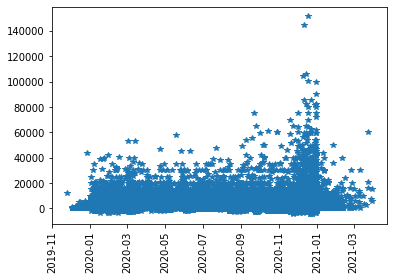

In [36]:
import matplotlib.pyplot as plt 

plt.plot(df_tmp["datEmissao"], df_tmp["vlrLiquido"], '*')
plt.xticks(rotation='vertical')

#### completando, substituindo e reformatando

In [42]:
df_reimbursements_2020["txtCNPJCPF"] = df_reimbursements_2020["txtCNPJCPF"].str.replace(r'\D', '')

/Users/gabriela/Development/Contrib/okb/python-inovacao-civica/notebooks/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [43]:
df_reimbursements_2020.indTipoDocumento.unique()

array(['4', '1', '0', '2'], dtype=object)

In [55]:
# Este dado representa o tipo de documento do fiscal – 
# 0 (Zero), para Nota Fiscal; 1 (um), para Recibo; e 2, para Despesa no Exterior.

converters = {
    "0": 'nota_fiscal',
    "1": 'recibo',
    "2": 'despesa_exterior',
    "4": None
}

converters

{'0': 'nota_fiscal', '1': 'recibo', '2': 'despesa_exterior', '4': None}

In [56]:
df_reimbursements_2020.indTipoDocumento.replace(converters, inplace=True)

In [57]:
df_reimbursements_2020.indTipoDocumento.unique()

array([None, 'recibo', 'nota_fiscal', 'despesa_exterior'], dtype=object)

ATENÇÃO: Alguns reembolsos aparecem divididos: eles estão associados ao mesmo número de documento ('ideDocumento'), mas os valores reembolsados aparecem parcelados. 

Isso pode trazer uma análise errada se não tomarmos cuidado. Por exemplo, isso pode afetar uma análise de frequência de pedidos de reembolso, se só olharmos quantos registros estão associados ao parlamentar.

In [74]:
keys = ['ideDocumento', 'numAno', 'ideDocumento']

df_reimbursements_2020.groupby(keys)["numRessarcimento"].agg("sum")
#df_reimbursements_2020.groupby(keys).agg({"vlrLiquido": "sum"}).rename(index="").reset_index()
#.rename(index=new)
#.reset_index(drop=True)

ideDocumento  numAno  ideDocumento
0             2020    0               0000000000000000000000000000000000000000000000...
10009         2020    10009                                                           0
10010         2020    10010                                                           0
10026         2020    10026                                                           0
10033         2020    10033                                                           0
                                                            ...                        
9968          2020    9968                                                            0
9971          2020    9971                                                            0
9972          2020    9972                                                            0
9984          2020    9984                                                            0
9998          2020    9998                                                           